# This jupyter notebook is prepared by Justin Mazor.

In [1]:
%config Completer.use_jedi = False

# 1. Load Data and perform basic EDA 

## import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st
import sklearn

## import the data to a dataframe and show the count of rows and columns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/jmazor/Machine-A3/main/hrdata2.csv')
print(df.shape)

(8955, 15)


## Show the top 5 and last 5 rows

In [4]:
print(df)

      Unnamed: 0  enrollee_id      city  city_development_index  gender  \
0              1        29725   city_40                   0.776    Male   
1              4          666  city_162                   0.767    Male   
2              7          402   city_46                   0.762    Male   
3              8        27107  city_103                   0.920    Male   
4             11        23853  city_103                   0.920    Male   
...          ...          ...       ...                     ...     ...   
8950       19147        21319   city_21                   0.624    Male   
8951       19149          251  city_103                   0.920    Male   
8952       19150        32313  city_160                   0.920  Female   
8953       19152        29754  city_103                   0.920  Female   
8954       19155        24576  city_103                   0.920    Male   

          relevent_experience enrolled_university education_level  \
0      No relevent experience 

## Show how many columns have null values

Presence of Null Values: False


<AxesSubplot:>

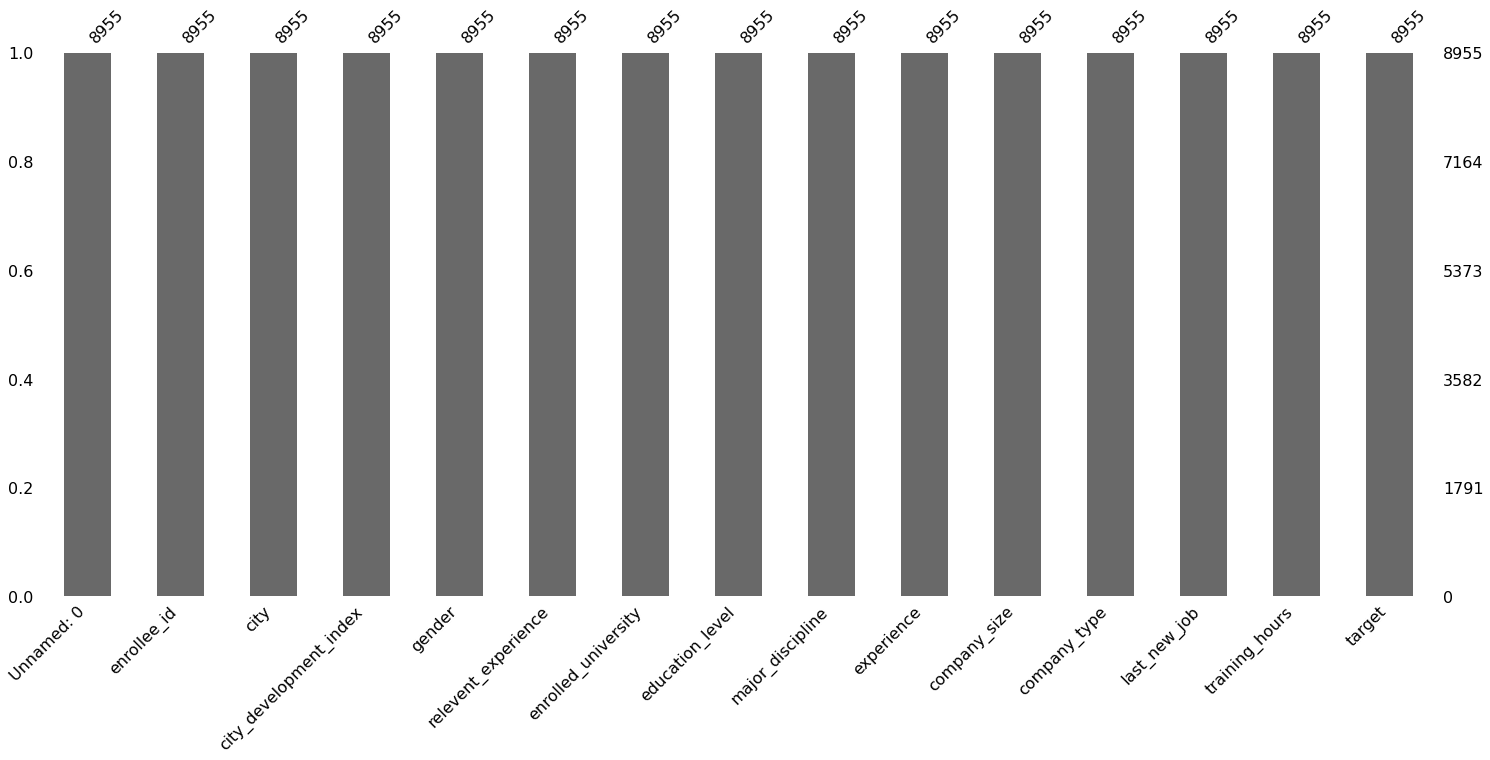

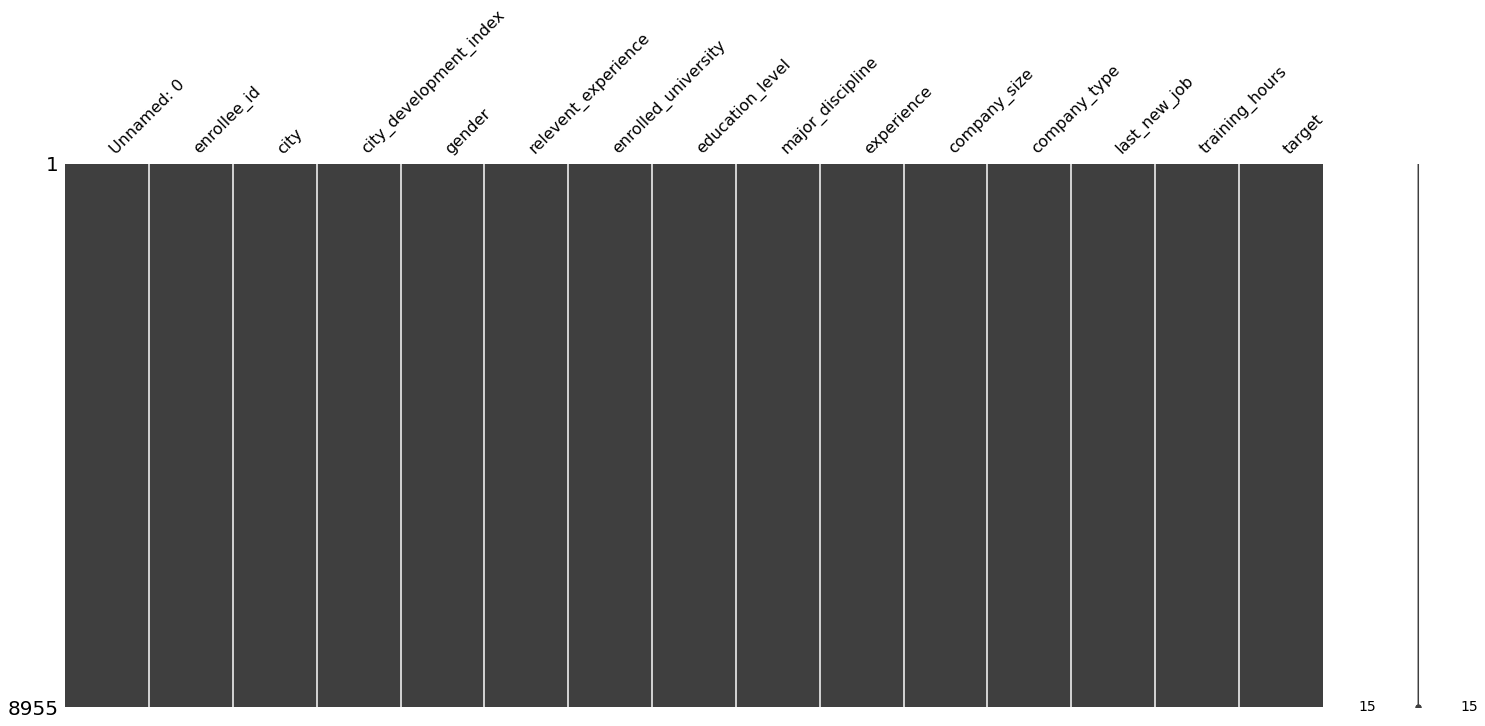

In [5]:
print("Presence of Null Values: "+ str(df.isnull().values.any()))
msno.bar(df)
msno.matrix(df)

## Plot the count of target

<AxesSubplot:>

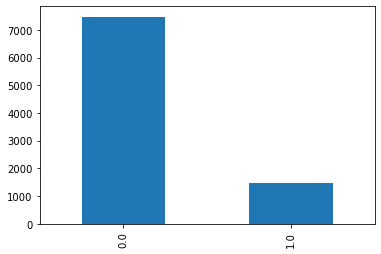

In [6]:
#plt.bar(['0', '1'], df['target'].value_counts())
df['target'].value_counts().plot.bar()

##  Plot the count of target and discuss its imbalances and probable issues and solutions

Many more 0 targets than 1

# 2. Feature Selection and Pre-processing 

## I. Preprocessing City: 

### I .Plot #of records per city so that the highest city counts are shown in descending order

<AxesSubplot:>

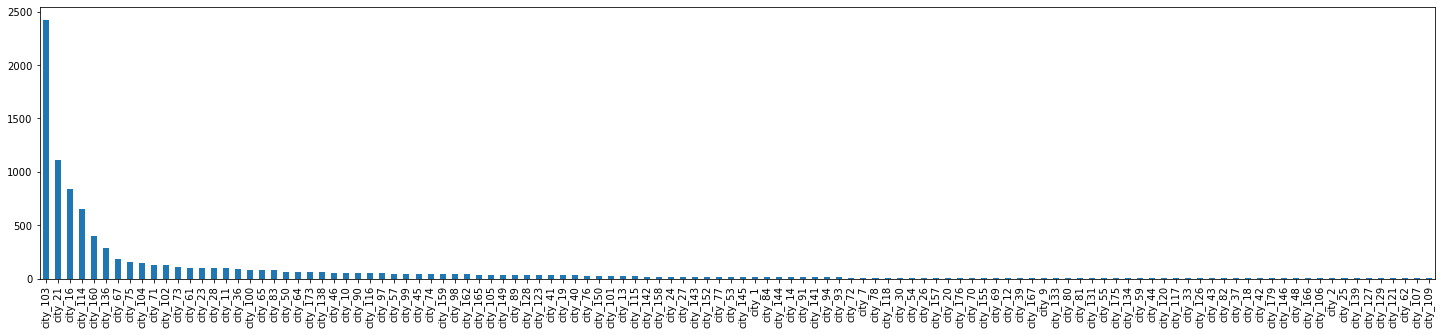

In [7]:
plt.figure(figsize = (25,5))
df['city'].value_counts().plot.bar()

### II. How many rows belong to the top 4 cities in total and how many for the remaining?

In [8]:
print("Top 4 Cities row count: " + str(df['city'].value_counts().head(4).sum(axis=0)))
print("Remaning Cities row count:", end=' ')
print(df['city'].value_counts().drop((df['city'].value_counts().head(4)).index).sum(axis=0))

Top 4 Cities row count: 5021
Remaning Cities row count: 3934


### III. Replace the city name with city_others if the city name is not within the top 4 city names.

In [9]:
df.loc[~df['city'].isin(df['city'].value_counts().head(4).index), 'city'] = 'city_others'

### IV. Show some sample data that the records have changed appropriately

city_others    3934
city_103       2426
city_21        1111
city_16         836
city_114        648
Name: city, dtype: int64
3135    city_others
7723        city_21
8522    city_others
2856       city_103
2287        city_16
2426    city_others
8542       city_114
2722    city_others
8011       city_103
7154    city_others
Name: city, dtype: object


<AxesSubplot:>

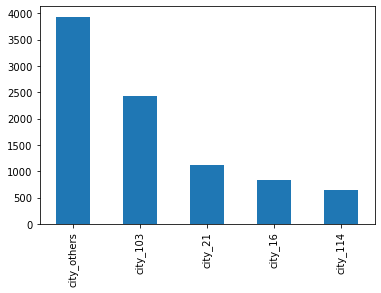

In [10]:
print(df['city'].value_counts())
print(df['city'].sample(n = 10))
df['city'].value_counts().plot.bar()

## II. Education Level:

### Show the unique values of education level

['Graduate' 'Masters' 'Phd']
Graduate    6252
Masters     2449
Phd          254
Name: education_level, dtype: int64
7397         Phd
5426    Graduate
2537    Graduate
7473    Graduate
3038     Masters
1032    Graduate
7913     Masters
6255    Graduate
4553    Graduate
3527    Graduate
Name: education_level, dtype: object


<AxesSubplot:>

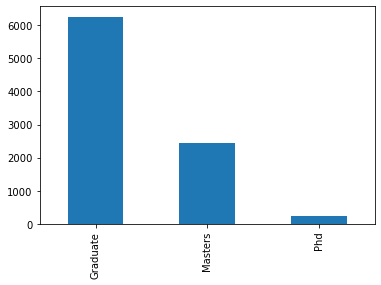

In [11]:
print(df['education_level'].unique())
print(df['education_level'].value_counts())
print(df['education_level'].sample(n = 10))
df['education_level'].value_counts().plot.bar()

### Replace the value of Education level column like ordinal values, "Graduate" -> 0, Masters->1, and Phd -> 2 

In [12]:
df['education_level'] = df['education_level'].map(dict(zip(['Graduate', 'Masters', 'Phd'], list(range(3))))) 

### Show some sample data that the records have changed appropriately

0    6252
1    2449
2     254
Name: education_level, dtype: int64
1774    1
3783    1
5588    0
2635    2
8250    1
7255    0
4839    1
1897    0
5750    0
7119    0
Name: education_level, dtype: int64


<AxesSubplot:>

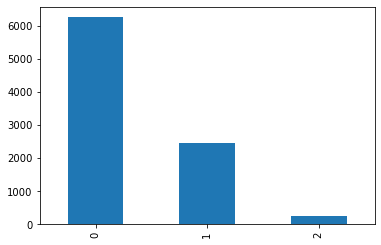

In [13]:
print(df['education_level'].value_counts())
print(df['education_level'].sample(n = 10))
df['education_level'].value_counts().plot.bar()

## company_size column

### Show the unique values of the company_size column

['50-99' '<10' '5000-9999' '1000-4999' '10/49' '100-500' '10000+'
 '500-999']
50-99        1986
100-500      1814
10000+       1449
10/49         951
1000-4999     930
<10           840
500-999       592
5000-9999     393
Name: company_size, dtype: int64
1951      500-999
5246        50-99
8799    1000-4999
7732    1000-4999
3227      100-500
3151      500-999
4766        50-99
5887      100-500
4011    1000-4999
2971        50-99
Name: company_size, dtype: object


<AxesSubplot:>

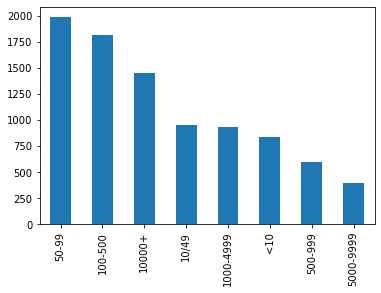

In [14]:
print(df['company_size'].unique())
print(df['company_size'].value_counts())
print(df['company_size'].sample(n = 10))
df['company_size'].value_counts().plot.bar()

### Change the values of the company_size column from 0 to 7 where e0 is <10 and 7 is 10000+. The order of the numbers should be based on the values of the column-like an ordinary variable.

In [15]:
df['company_size'] = df['company_size'].map(dict(zip(['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'], list(range(8)))))

### Show the updated unique values

2    1986
3    1814
7    1449
1     951
5     930
0     840
4     592
6     393
Name: company_size, dtype: int64
8850    5
1046    2
6964    3
8348    7
4152    5
2887    7
922     7
4481    0
644     3
2020    0
Name: company_size, dtype: int64


<AxesSubplot:>

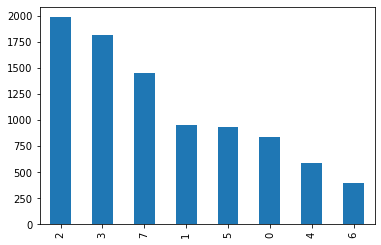

In [16]:
print(df['company_size'].value_counts())
print(df['company_size'].sample(n = 10))
df['company_size'].value_counts().plot.bar()

## Last_new_job:

### Show the unique values of the last_new_job column

['>4' '4' '1' '3' '2' 'never']
1        3838
>4       1965
2        1570
3         610
4         599
never     373
Name: last_new_job, dtype: int64
8028     1
5237     1
5584     1
927      2
2219     4
8199     1
6264     1
1282    >4
8        2
4444     1
Name: last_new_job, dtype: object


<AxesSubplot:>

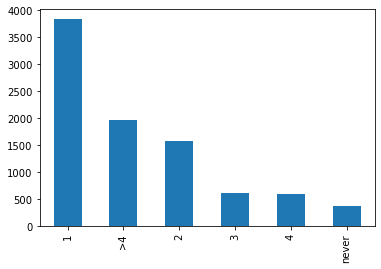

In [17]:
print(df['last_new_job'].unique())
print(df['last_new_job'].value_counts())
print(df['last_new_job'].sample(n = 10))
df['last_new_job'].value_counts().plot.bar()

### Convert the values of this column to never->0, 1->1,....>4 -->5

In [18]:
df['last_new_job'] = df['last_new_job'].map(dict(zip(['never', '1', '2', '3', '4', '>4'], list(range(6)))))

### Show the updated values

1    3838
5    1965
2    1570
3     610
4     599
0     373
Name: last_new_job, dtype: int64
6621    2
8861    1
2262    1
6022    1
2932    1
455     2
3881    0
7638    2
1201    1
2975    1
Name: last_new_job, dtype: int64


<AxesSubplot:>

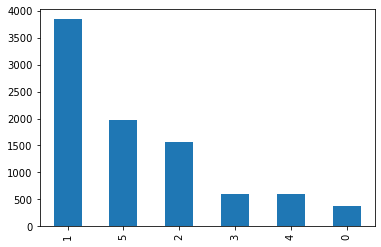

In [19]:
print(df['last_new_job'].value_counts())
print(df['last_new_job'].sample(n = 10))
df['last_new_job'].value_counts().plot.bar()

## Other columns 

### Show the unique values of company_type, major_descipline, enrolled_university, relevant_experience, gender, and updated city column

In [20]:
print(df['company_type'].unique())
print(df['major_discipline'].unique())
print(df['enrolled_university'].unique())
print(df['relevent_experience'].unique())
print(df['gender'].unique())
print(df['city'].unique())

['Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Public Sector' 'NGO'
 'Other']
['STEM' 'Humanities' 'Business Degree' 'Other' 'No Major' 'Arts']
['no_enrollment' 'Part time course' 'Full time course']
['No relevent experience' 'Has relevent experience']
['Male' 'Female' 'Other']
['city_others' 'city_103' 'city_114' 'city_21' 'city_16']


### As one-hot encoding is a bit strict, use panda's get_dummies function to create binary columns for the values of the following columns:

    company_tye
    major_descipline
    enrolled_university
    relevant_eperience
    gender
    updated city column


In [21]:
df = pd.get_dummies(df, columns=['company_type', 'major_discipline', 'enrolled_university', 'relevent_experience', 'gender', 'city'])

### III. SHow the top 5 and last 5 rows to show that the table has changed 

In [22]:
pd.set_option('display.max_columns', None)
print(df)

      Unnamed: 0  enrollee_id  city_development_index  education_level  \
0              1        29725                   0.776                0   
1              4          666                   0.767                1   
2              7          402                   0.762                0   
3              8        27107                   0.920                0   
4             11        23853                   0.920                0   
...          ...          ...                     ...              ...   
8950       19147        21319                   0.624                0   
8951       19149          251                   0.920                1   
8952       19150        32313                   0.920                0   
8953       19152        29754                   0.920                0   
8954       19155        24576                   0.920                0   

      experience  company_size  last_new_job  training_hours  target  \
0           15.0             2         

### IV. Also, show the shape of the table

In [23]:
print(df.shape)

(8955, 34)


## VI. Drop the enrollee_id and any duplicate columns (if you have multiple city column one with actual and one with updated, then remove the actual one)

In [24]:
df = df.drop('enrollee_id', axis =1)

## VII. Feature Scaling:

### I. Use sklearn.preprocessing's MinMaxScaler to perform min max scaling to all the columns (see documentation on how to use it)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

### II. Show sample records that show some the scaled records

In [26]:
print(df.sample(n=10))

      Unnamed: 0  city_development_index  education_level  experience  \
3329    0.365511                0.922156              0.0    0.571429   
4749    0.525425                0.756487              0.5    0.619048   
2082    0.227315                0.888224              0.0    0.428571   
5632    0.625874                0.351297              0.0    0.428571   
5079    0.561919                0.954092              0.5    1.000000   
3770    0.415736                0.942116              0.5    0.666667   
3152    0.346037                0.942116              0.0    0.476190   
78      0.008249                0.942116              0.0    0.619048   
982     0.108541                0.774451              0.5    1.000000   
760     0.084421                0.942116              0.0    0.428571   

      company_size  last_new_job  training_hours  target  \
3329      0.714286           0.8        0.319403     0.0   
4749      0.714286           0.0        0.041791     0.0   
2082      0.4285

In [27]:
print(df)

      Unnamed: 0  city_development_index  education_level  experience  \
0       0.000000                0.654691              0.0    0.714286   
1       0.000157                0.636727              0.5    1.000000   
2       0.000313                0.626747              0.0    0.619048   
3       0.000365                0.942116              0.0    0.333333   
4       0.000522                0.942116              0.0    0.238095   
...          ...                     ...              ...         ...   
8950    0.999582                0.351297              0.0    0.047619   
8951    0.999687                0.942116              0.5    0.428571   
8952    0.999739                0.942116              0.0    0.476190   
8953    0.999843                0.942116              0.0    0.333333   
8954    1.000000                0.942116              0.0    1.000000   

      company_size  last_new_job  training_hours  target  \
0         0.285714           1.0        0.137313     0.0   
1  

## VIII. Move the target column to the last column of the data frame and show that it has changed

In [28]:
df = df.reindex((df.columns[df.columns != 'target']).append(df.columns[df.columns == 'target']), axis=1) 
print(df)

      Unnamed: 0  city_development_index  education_level  experience  \
0       0.000000                0.654691              0.0    0.714286   
1       0.000157                0.636727              0.5    1.000000   
2       0.000313                0.626747              0.0    0.619048   
3       0.000365                0.942116              0.0    0.333333   
4       0.000522                0.942116              0.0    0.238095   
...          ...                     ...              ...         ...   
8950    0.999582                0.351297              0.0    0.047619   
8951    0.999687                0.942116              0.5    0.428571   
8952    0.999739                0.942116              0.0    0.476190   
8953    0.999843                0.942116              0.0    0.333333   
8954    1.000000                0.942116              0.0    1.000000   

      company_size  last_new_job  training_hours  \
0         0.285714           1.0        0.137313   
1         0.285714 

# 3. X/Y and Training/Test Split with stratified sampling and SMOTE

## I. Copy all the features into X and the target to Y

In [29]:
X = df.drop('target', axis=1).values
y = df['target'].values

## II. Show the ratio of 1 and 0 in Y

Ratio of 1: 0.16560580681183695
Ratio of 0: 0.834394193188163


<BarContainer object of 2 artists>

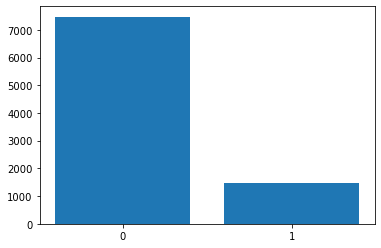

In [30]:
print("Ratio of 1: " + str(np.count_nonzero(y == 1) / y.size))
print("Ratio of 0: " + str(np.count_nonzero(y == 0) / y.size))
plt.bar(['0','1'], [np.count_nonzero(y == 0), np.count_nonzero(y == 1)] )


## III. Use sklearn's train_test_split to split the data set into training and test sets. There should be 30% records in the test set. The random_stat should be 0. As we want to have the same ratio of 0 and 1 in the test set, use the stratify parameter to the Y.   

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = .3, train_size = .7, random_state = 0, stratify = y)

## IV. Show the ratio of 0 and 1 in y_train and then y_test

y_train: 
Ratio of 1: 0.1656030631780472
Ratio of 0: 0.8343969368219528


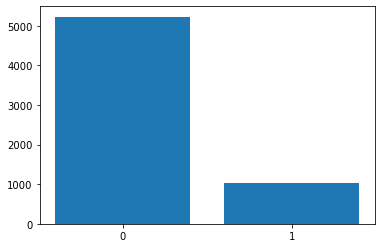


y_test
Ratio of 1: 0.1656122069222181
Ratio of 0: 0.8343877930777819


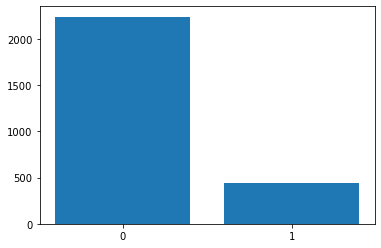

In [32]:
print("y_train: ")
print("Ratio of 1: " + str(np.count_nonzero(y_train == 1) / y_train.size))
print("Ratio of 0: " + str(np.count_nonzero(y_train == 0) / y_train.size))
plt.bar(['0','1'], [np.count_nonzero(y_train == 0), np.count_nonzero(y_train == 1)] )
plt.show()
print("\ny_test")
print("Ratio of 1: " + str(np.count_nonzero(y_test == 1) / y_test.size))
print("Ratio of 0: " + str(np.count_nonzero(y_test == 0) / y_test.size))
plt.bar(['0','1'], [np.count_nonzero(y_test == 0), np.count_nonzero(y_test == 1)] )
plt.show()

## V. Rebalance:

### I. Use imblearn's SMOTE to balance the x_train

In [33]:
from imblearn.over_sampling import SMOTE
X_train_unbalanced = X_train
y_train_unbalanced = y_train
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

## II. Show the ratio of 0 and 1 in Y_train after rebalancing.

y_train: 
Ratio of 1: 0.5
Ratio of 0: 0.5


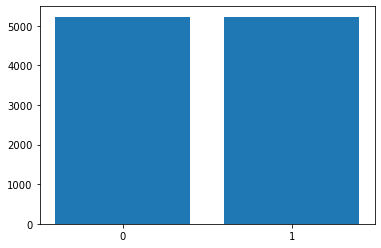

In [34]:
print("y_train: ")
print("Ratio of 1: " + str(np.count_nonzero(y_train == 1) / y_train.size))
print("Ratio of 0: " + str(np.count_nonzero(y_train == 0) / y_train.size))
plt.bar(['0','1'], [np.count_nonzero(y_train == 0), np.count_nonzero(y_train == 1)] )
plt.show()

# PCA and Logistic Regression 

## I. As we have many features now, we would like to do principal component analysis (you have learned it in datacamp). As part of ti, create pipeline to find how many dimensions give you the best logistic regression model

>1 0.685 (0.013)
>2 0.691 (0.013)
>3 0.695 (0.013)
>4 0.700 (0.012)
>5 0.712 (0.013)
>6 0.712 (0.013)
>7 0.714 (0.013)
>8 0.728 (0.010)
>9 0.729 (0.011)
>10 0.735 (0.011)
>11 0.737 (0.011)
>12 0.737 (0.011)
>13 0.736 (0.011)
>14 0.734 (0.011)
>15 0.734 (0.011)
>16 0.734 (0.013)
>17 0.733 (0.013)
>18 0.733 (0.013)
>19 0.735 (0.014)
>20 0.735 (0.014)
>21 0.739 (0.012)
>22 0.739 (0.012)
>23 0.739 (0.012)
>24 0.739 (0.012)
>25 0.739 (0.012)
>26 0.739 (0.012)
>27 0.739 (0.012)
>28 0.739 (0.012)
>29 0.739 (0.012)
>30 0.739 (0.012)
>31 0.739 (0.012)
>32 0.739 (0.012)


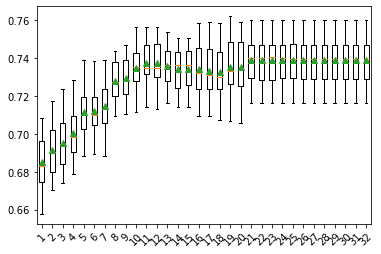

In [35]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# get the dataset
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,33):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

## II. Based on the number of features chosen in the above step, use the test set to evaluate the model for accuracy

In [98]:
steps = [('pca', PCA(n_components=21)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score 
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)


0.7990323781168589

## Show the confusion matrix and interpret the numbers in the confusion matrix 

In [118]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict, labels=[0,1]))

[[1890  352]
 [ 188  257]]


These results show 352 False Postives an 188 False Negatives. With 1890 True Negative and 257 True Positive

## Show precision, recall, and f1 score

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Score: " + str(precision_score(y_test, y_predict)))
print("Recall Score: " + str(recall_score(y_test, y_predict)))
print("F1 Score: " + str(f1_score(y_test, y_predict)))

Precision Score: 0.4220032840722496
Recall Score: 0.5775280898876405
F1 Score: 0.4876660341555977


##  Plot ROC curve and find AUC

In [39]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(model, X_test, y_test, cv=3, method="predict_proba")
#y_scores = model.predict_proba(X_test)
y_scores = y_scores[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

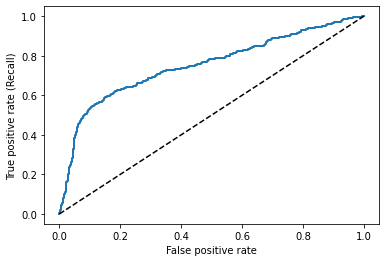

In [40]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score
print("AUC Score:", end=' ')
print(roc_auc_score(y_test, y_scores))

AUC Score: 0.7521675069410337


## Plot precision-recall curve for different thresholds and discuss the plot

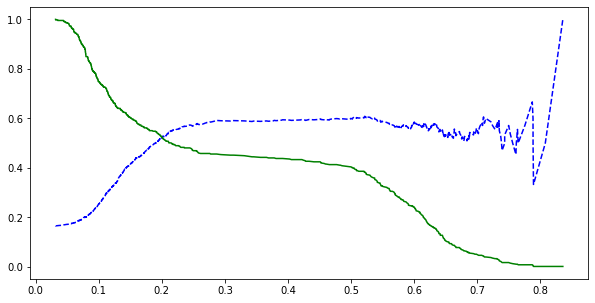

In [42]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    #[...] # highlight the threshold, add the legend, axis label and grid

plt.figure(figsize=(10,5))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
#dotted line precision, solid line recall

It appears that precision goes up as threshold increases while can only go down. However there are times where the precision goes down as threshold increases. 

# 5. Softmaxt regression: 

## I. How softmax regression is related to logistic regression? What library can you use for softmax regression?

Softmax regression is more generalized version of logistic regression which allows us to use it for a classifcation model compared to binary (0, 1). Softmax regression uses the sklearn linear_model.LogisticRegression and you would set the multiclass param.

# 6. KNN

## I. Use sklearn's KNN classifier to train (with k=  10) and predict the model based on the unbalanced training set (the training set before rebalancing) and test it and show the confusion matrix and classification report

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train_unbalanced, y_train_unbalanced)

y_neigh_pred = neigh.predict(X_test)
print(confusion_matrix(y_test, y_neigh_pred))
print(classification_report(y_test, y_neigh_pred))

[[2155   87]
 [ 312  133]]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      2242
         1.0       0.60      0.30      0.40       445

    accuracy                           0.85      2687
   macro avg       0.74      0.63      0.66      2687
weighted avg       0.83      0.85      0.83      2687



## II. Use sklearn's KNN classifier to train (with k=  10) and predict the model based on the rebalanced training set and test it and show the confusion matrix and classification report

In [44]:
neigh.fit(X_train, y_train)

y_neigh_pred = neigh.predict(X_test)
print(confusion_matrix(y_test, y_neigh_pred))
print(classification_report(y_test, y_neigh_pred))

[[1710  532]
 [ 170  275]]
              precision    recall  f1-score   support

         0.0       0.91      0.76      0.83      2242
         1.0       0.34      0.62      0.44       445

    accuracy                           0.74      2687
   macro avg       0.63      0.69      0.63      2687
weighted avg       0.82      0.74      0.77      2687



## III. Use grid search to tune the following hyperparameters of KNN: number of neighbors (between 1 and 20), weights  (uniform or distance), and metrics (Euclidean, Manhattan, or Minkowski)istance) to use for KNN. While creating an instance of GridSearchCV, use multiple evaluation metrics such as AUC and accuracy 

In [45]:
from sklearn.model_selection import GridSearchCV

knn_params = {
    "n_neighbors": range(1, 21),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    #"algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    #"leaf_size": range(1, 50, 5)
}
knn = KNeighborsClassifier()

#grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, n_jobs=-1, cv=cv, scoring="accuracy", refit="AUC", error_score=0, verbose = 3)
grid_results = grid_search.fit(X_train, y_train)


Fitting 30 folds for each of 120 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2648 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3128 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  2.6min finished


## IV The above grid search process can take a couple of minutes. After completing the process, print the best_params_

In [46]:
print(grid_results.best_params_)

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


## V Based on the result from grid search, use the parameters to train a model, test it with test set, and then print the confusion matrix and classification report. Also, show the AUC of ROC.

In [47]:
knn_final_model = knn.set_params(**grid_results.best_params_)
knn_final_model.fit(X_train, y_train)
y_knn_pred = knn_final_model.predict(X_test)

y_knn_scores = knn_final_model.predict_proba(X_test)[:,1]
print("AUC: " + str(roc_auc_score(y_test, y_knn_scores)))


#summarize results
print(classification_report(y_test, y_knn_pred))
print(confusion_matrix(y_test, y_knn_pred))

AUC: 0.6334207018212069
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      2242
         1.0       0.35      0.43      0.38       445

    accuracy                           0.77      2687
   macro avg       0.61      0.63      0.62      2687
weighted avg       0.79      0.77      0.78      2687

[[1883  359]
 [ 255  190]]


## VI. Use PCA and based on that train model, test it and then print the confusion matrix and classification report. Also, show the AUC of ROC

In [48]:
steps = [('pca', PCA(n_components=21)), ('m', knn_final_model)]
knn_pipeline = Pipeline(steps=steps)
knn_pipeline.fit(X_train, y_train)
y_pipeline_pred = knn_pipeline.predict(X_test)

y_knn_scores = knn_pipeline.predict_proba(X_test)
y_knn_scores = y_knn_scores[:,1]
print("AUC: " + str(roc_auc_score(y_test, y_knn_scores)))


#summarize results
print(classification_report(y_test, y_pipeline_pred))
print(confusion_matrix(y_test, y_pipeline_pred))

AUC: 0.6451538052902204
              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86      2242
         1.0       0.35      0.46      0.40       445

    accuracy                           0.77      2687
   macro avg       0.62      0.65      0.63      2687
weighted avg       0.80      0.77      0.78      2687

[[1855  387]
 [ 239  206]]


## VII. A short discussion on the 4 models and their differences.

Our first model using the unbalanced training set has the highest accuracy however it has an extremely high False Negative rate meaning this model is heavily swayed by the unbalanced set. Using a balanced training set adresses this issue but results in a higher overall missclasifcation rate and a much higher false positive rate. Using the grid search we then determine much more reasonable hyperparamters which results in a worse accuracy but much better overall results regarding FN and FP. Lastly our pipelined model results in slightly better results.

# 7. Naive Bayes

## I. Train a model with GaussianNB, test it and then print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

AUC: 0.7221702131924747
[[ 966 1276]
 [ 104  341]]
              precision    recall  f1-score   support

         0.0       0.90      0.43      0.58      2242
         1.0       0.21      0.77      0.33       445

    accuracy                           0.49      2687
   macro avg       0.56      0.60      0.46      2687
weighted avg       0.79      0.49      0.54      2687

GaussianNB
Misclassified samples: 1380
Accuracy: 0.49


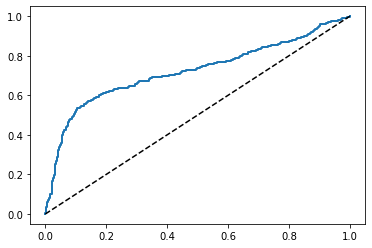

In [49]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb_pred = gnb.predict(X_test)
y_gnb_scores = gnb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_gnb_scores)
plot_roc_curve(fpr, tpr)
print("AUC: " + str(roc_auc_score(y_test, y_gnb_scores)))

print(confusion_matrix(y_test, y_gnb_pred))
print(classification_report(y_test, y_gnb_pred))

# how did our model perform?
count_misclassified = (y_test != y_gnb_pred).sum()

print("GaussianNB")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_gnb_pred)
print('Accuracy: {:.2f}'.format(accuracy))

## II. Train a model with CategoricalNB, test it and then print the confusion matrix and classification report. Also, plot ROC curve, and show the AUC of ROC and the count of the number of misclassification.

AUC: 0.734517735970091
[[1922  320]
 [ 209  236]]
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      2242
         1.0       0.42      0.53      0.47       445

    accuracy                           0.80      2687
   macro avg       0.66      0.69      0.68      2687
weighted avg       0.82      0.80      0.81      2687

CategoricalNB
Misclassified samples: 529
Accuracy: 0.80


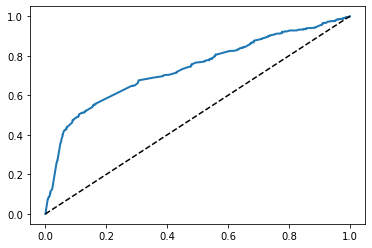

In [50]:
cnb = CategoricalNB()
cnb.fit(X_train, y_train)
y_cnb_pred = cnb.predict(X_test)
y_cnb_scores = cnb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_cnb_scores)
plot_roc_curve(fpr, tpr)
print("AUC: " + str(roc_auc_score(y_test, y_cnb_scores)))

from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_cnb_pred))
print(classification_report(y_test, y_cnb_pred))

# how did our model perform?
count_misclassified = (y_test != y_cnb_pred).sum()

print("CategoricalNB")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_cnb_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# 8. Support Vector Machine  

## I. Build a support vector machine model using SVC. Use grid search to tune some parameters and then based on that show the best parameters found

In [51]:
from sklearn.svm import SVC


## I have tested with poly/linear and it took 4 hours and were not selected. I am removing them from the test
svc_params = {
    "C": [0.1,1,10,100, 1000],
    "gamma": [1,0.1,0.01,0.001,0.0001],
    "kernel": ["rbf", "sigmoid"]
}
svc = SVC(probability=True)

#grid search
svc_grid_search = GridSearchCV(estimator=svc, param_grid=svc_params, n_jobs=-1, cv=3, refit=True, scoring="accuracy")
svc_grid_results = svc_grid_search.fit(X_train, y_train)

In [52]:
print(svc_grid_results.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


## 2. Test the model and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

AUC: 0.6419408834407481
[[1901  341]
 [ 274  171]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      2242
         1.0       0.33      0.38      0.36       445

    accuracy                           0.77      2687
   macro avg       0.60      0.62      0.61      2687
weighted avg       0.78      0.77      0.78      2687

SVC
Misclassified samples: 615
Accuracy: 0.77


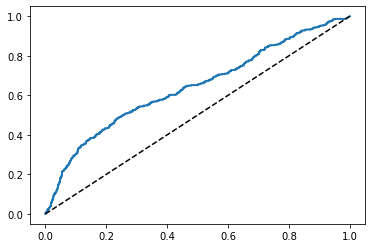

In [53]:
#svc = SVC(probability=True, C=1000, gamma=1, kernel='rbf')
#svc.fit(X_train, y_train)
#svc = svc.set_params(**svc_grid_results.best_params_)
#svc.fit(X_train, y_train)
y_svc_scores = svc_grid_results.predict_proba(X_test)[:,1]
y_svc_pred = svc_grid_results.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_svc_scores)
plot_roc_curve(fpr, tpr)
print("AUC: " + str(roc_auc_score(y_test, y_svc_scores)))

print(confusion_matrix(y_test, y_svc_pred))
print(classification_report(y_test, y_svc_pred))

# how did our model perform?
count_misclassified = (y_test != y_svc_pred).sum()

print("SVC")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_svc_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# 9. Decision Tree

## 1. Build a decision tree model using sklearns DecisionTreeClassifier. Use the unbalanced training set, entropy as the criterion. Try with different max_depth (or use grid search). After building model, test it and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification. Show the decision tree. (you can simply import tree from sklearn and call tree.plot_tree with your model and the call plt.show. At the beginning of this process, use plt.figure to change the figsize

In [89]:
from sklearn.tree import DecisionTreeClassifier
dtc_params = {
    "criterion": ["entropy"],
    "max_depth": range(1, 33)
}

dtc = DecisionTreeClassifier()
#grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
dtc_grid_search = GridSearchCV(estimator=dtc, param_grid=dtc_params, n_jobs=-1, cv=cv, refit=True, scoring='accuracy', verbose =3)
dtc_grid_results = dtc_grid_search.fit(X_train_unbalanced, y_train_unbalanced)


print(dtc_grid_results.best_params_)

Fitting 30 folds for each of 32 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 843 tasks      | elapsed:    2.2s


{'criterion': 'entropy', 'max_depth': 3}


[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    2.6s finished


AUC: 0.617218274213433
[[2090  152]
 [ 224  221]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      2242
         1.0       0.59      0.50      0.54       445

    accuracy                           0.86      2687
   macro avg       0.75      0.71      0.73      2687
weighted avg       0.85      0.86      0.86      2687

Decision Tree Classifier Unbalanced
Misclassified samples: 376
Accuracy: 0.86


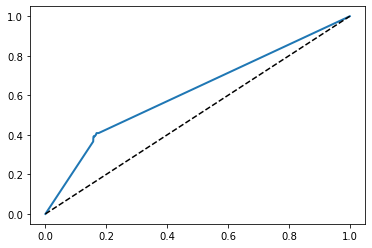

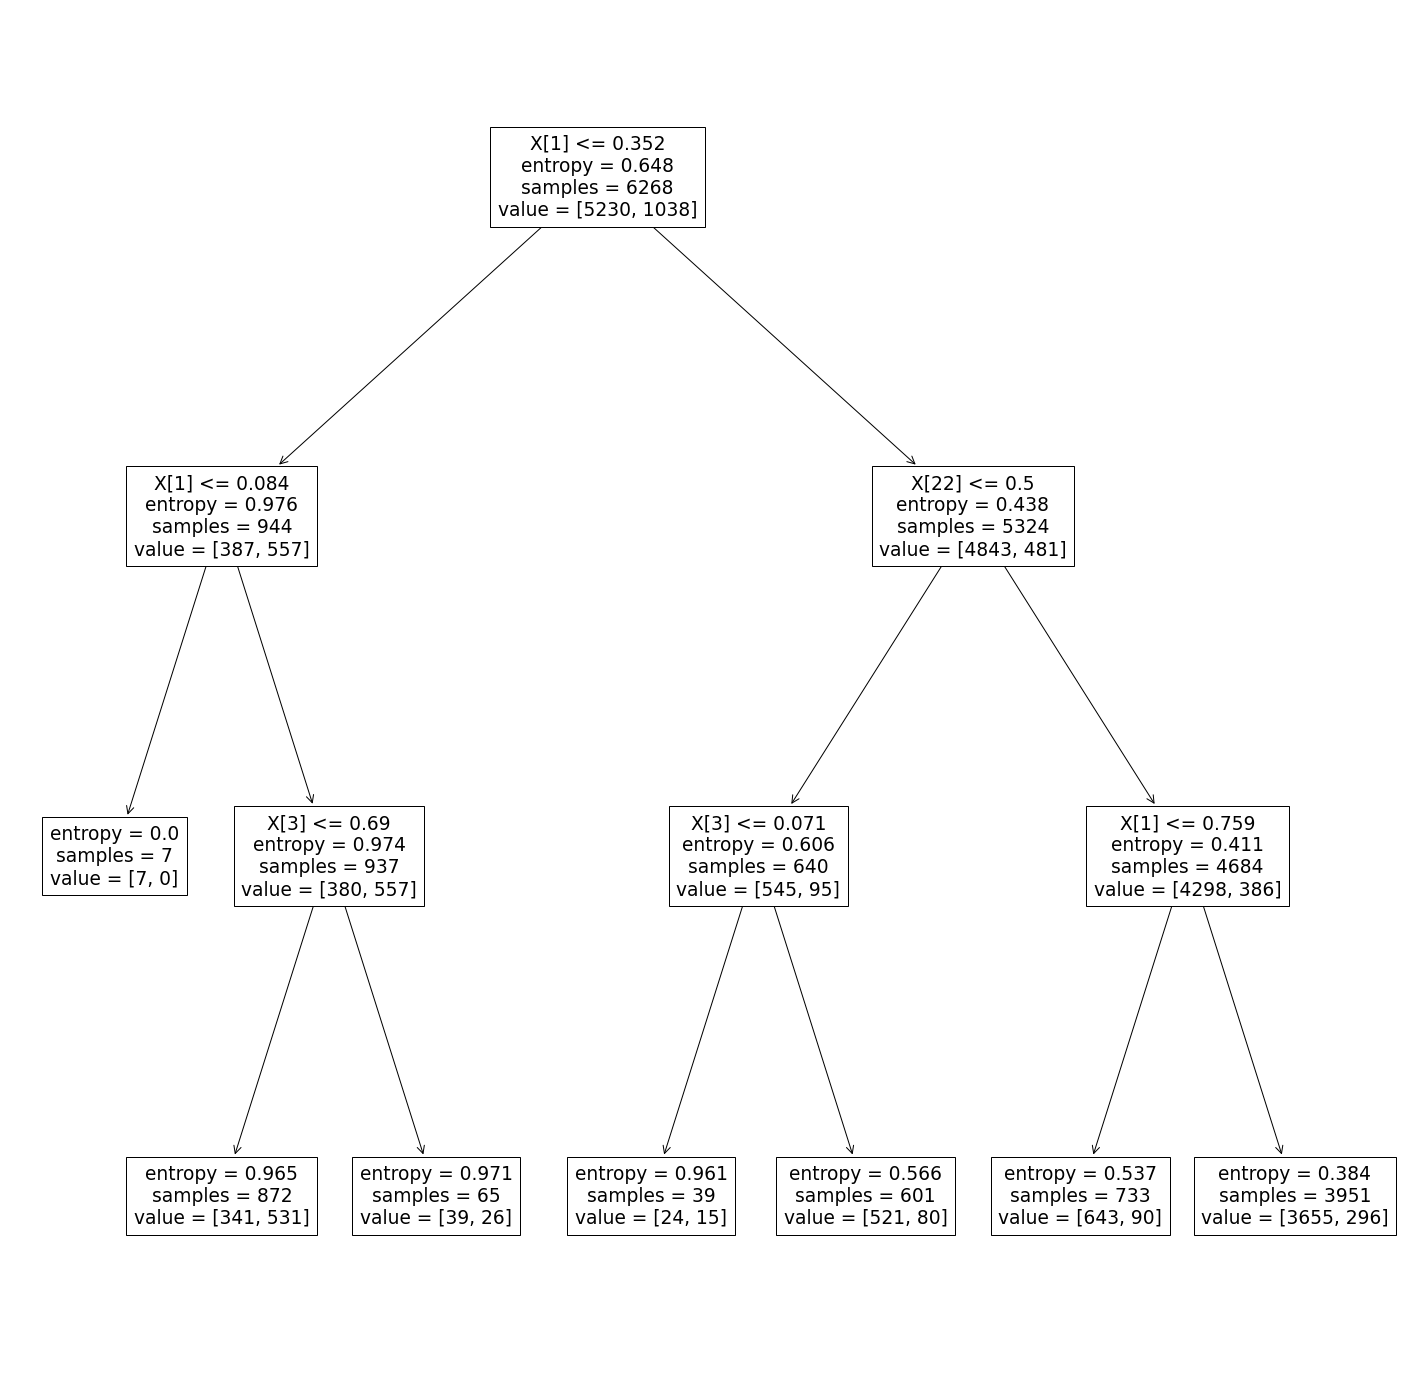

In [90]:
from sklearn.tree import plot_tree
#dtc = dtc.set_params(**dtc_grid_results.best_params_)
#dtc.fit(X_train, y_train)
y_dtc_pred = dtc_grid_results.predict(X_test)
#y_dtc_scores = cross_val_predict(dtc, X_test, y_test, method="predict_proba")[:,1]
y_dtc_score = dtc_grid_results.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_dtc_scores)
plot_roc_curve(fpr, tpr)
print("AUC: " + str(roc_auc_score(y_test, y_dtc_scores)))

print(confusion_matrix(y_test, y_dtc_pred))
print(classification_report(y_test, y_dtc_pred))

# how did our model perform?
count_misclassified = (y_test != y_dtc_pred).sum()

print("Decision Tree Classifier Unbalanced")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_dtc_pred)
print('Accuracy: {:.2f}'.format(accuracy))
dtc = dtc.set_params(**dtc_grid_results.best_params_)
dtc.fit(X_train_unbalanced, y_train_unbalanced)
plt.figure(figsize=(25,25))
plot_tree(dtc)
plt.show()

## 2. Perform the same tasks as 9.1 with the balanced training set

In [95]:
from sklearn.tree import DecisionTreeClassifier
dtc_params = {
    "criterion": ["entropy"],
    "max_depth": range(1, 33)
}

dtc = DecisionTreeClassifier()
#grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
dtc_grid_search = GridSearchCV(estimator=dtc, param_grid=dtc_params, n_jobs=-1, cv=cv, refit=True, verbose =3)
dtc_grid_results = dtc_grid_search.fit(X_train, y_train)


print(dtc_grid_results.best_params_)

Fitting 30 folds for each of 32 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    3.1s


{'criterion': 'entropy', 'max_depth': 28}


[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    5.2s finished


AUC: 0.6217933426214556
[[1872  370]
 [ 264  181]]
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86      2242
         1.0       0.33      0.41      0.36       445

    accuracy                           0.76      2687
   macro avg       0.60      0.62      0.61      2687
weighted avg       0.79      0.76      0.77      2687

Decision Tree Classifier
Misclassified samples: 634
Accuracy: 0.76


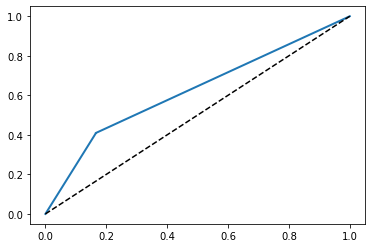

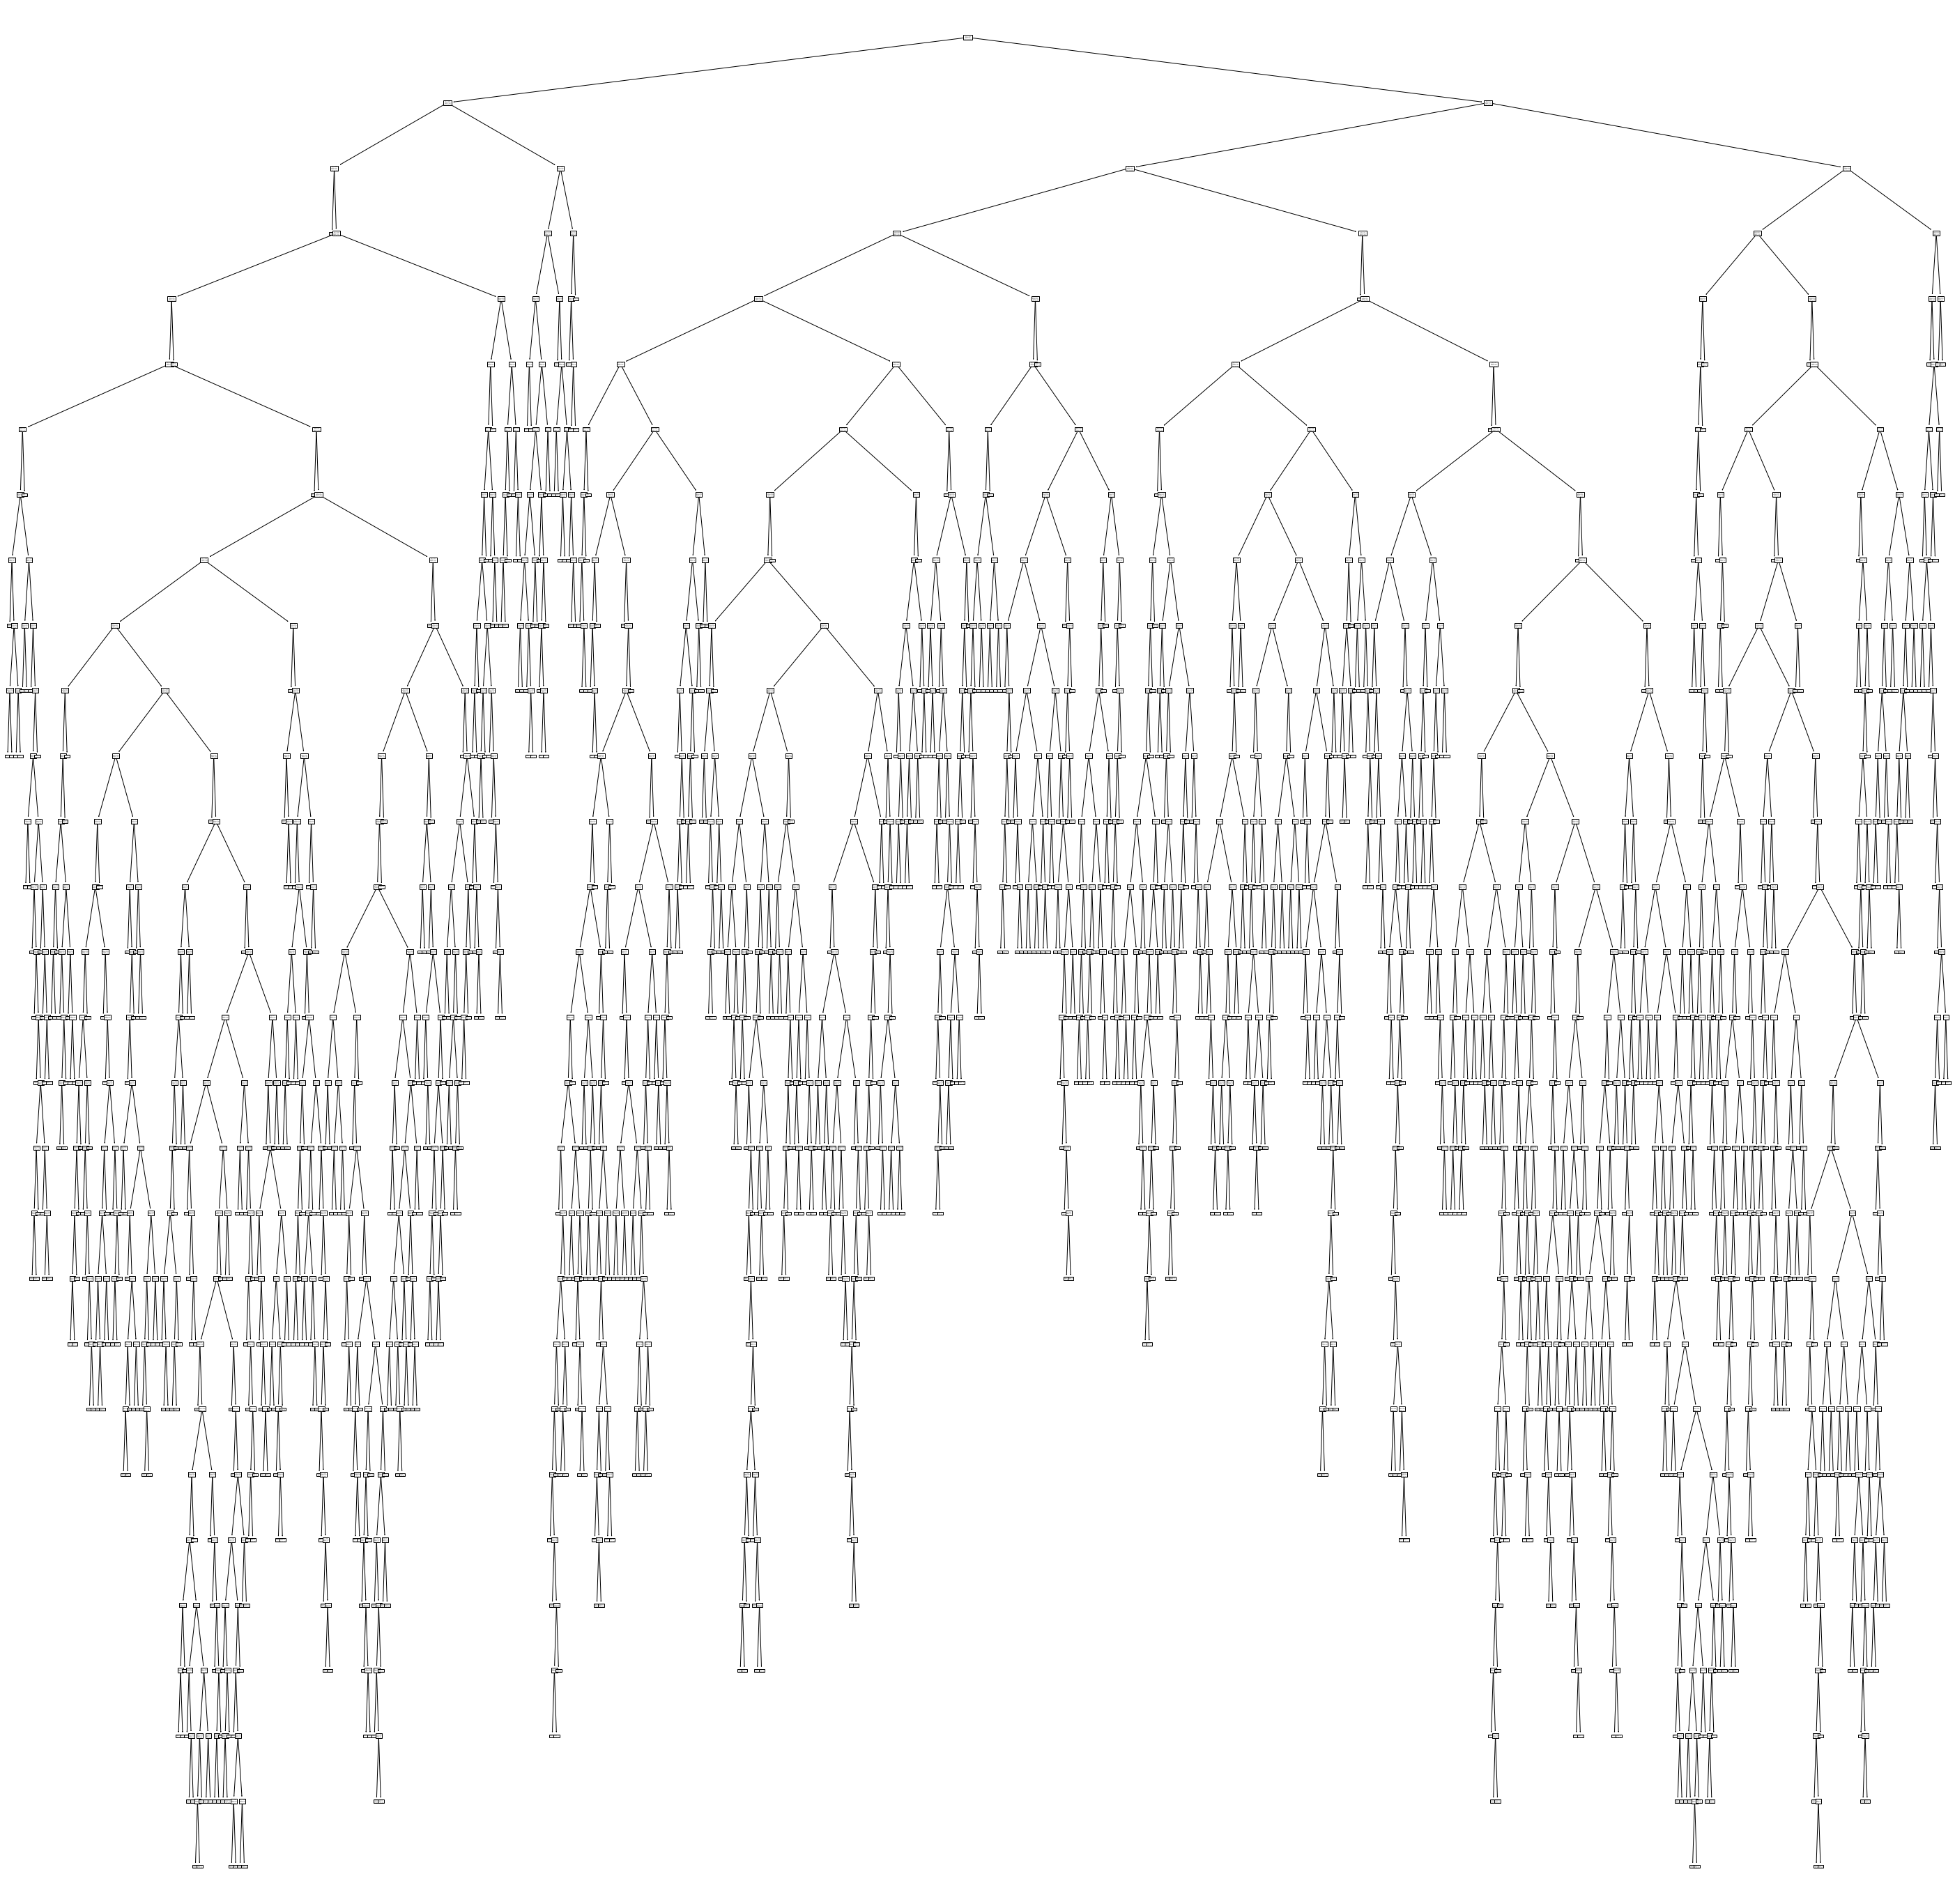

In [96]:
#dtc = dtc_grid_results.best_estimator_
#dtc.fit(X_test, y_test)
#y_dtc_scores = cross_val_predict(dtc, X_test, y_test, method="predict_proba")[:,1]
y_dtc_scores = dtc_grid_results.predict_proba(X_test)[:,1]
y_dtc_pred = dtc_grid_results.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_dtc_scores)
plot_roc_curve(fpr, tpr)
print("AUC: " + str(roc_auc_score(y_test, y_dtc_scores)))

print(confusion_matrix(y_test, y_dtc_pred))
print(classification_report(y_test, y_dtc_pred))

# how did our model perform?
count_misclassified = (y_test != y_dtc_pred).sum()

print("Decision Tree Classifier")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_dtc_pred)
print('Accuracy: {:.2f}'.format(accuracy))
dtc = dtc.set_params(**dtc_grid_results.best_params_)
dtc.fit(X_train, y_train)
plt.figure(figsize=(50,50))
plot_tree(dtc)
plt.show()

## 3. Discuss any difference and also discuss part of the tree of 9.2


DISCUSS

# 10 .Random Forest

## 1. Use grid search to tune the max_depth, min_samples_leaf, and n_estimators  (helpful link:https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/) [it may take about 5 minutes

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc_params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
#grid search
rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=rfc_params, n_jobs=-1, cv=4, refit=True, scoring = "accuracy", verbose =3)
rfc_grid_results = rfc_grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   24.0s finished


## 2. Print the best estimator

In [60]:
print(rfc_grid_results.best_params_)

{'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 100}


## 3. Train the model. After building the model, test it and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

AUC: 0.7607633633693833
[[2052  190]
 [ 199  246]]
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91      2242
         1.0       0.56      0.55      0.56       445

    accuracy                           0.86      2687
   macro avg       0.74      0.73      0.74      2687
weighted avg       0.85      0.86      0.85      2687

RFC
Misclassified samples: 389
Accuracy: 0.86


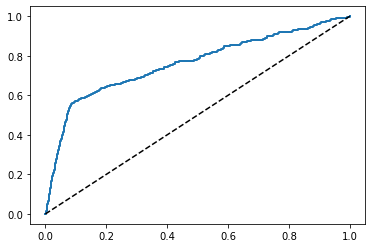

In [72]:
y_rfc_scores = rfc_grid_results.predict_proba(X_test)[:,1]
y_rfc_pred = rfc_grid_results.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_rfc_scores)
plot_roc_curve(fpr, tpr)
print("AUC: " + str(roc_auc_score(y_test, y_rfc_scores)))

print(confusion_matrix(y_test, y_rfc_pred))
print(classification_report(y_test, y_rfc_pred))

count_misclassified = (y_test != y_rfc_pred).sum()

print("RFC")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_rfc_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# 11. Boosting Algorithms

## 1. Train an AdaBoostClassifier model with some manual/grid search-based parameters and then test it and then print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

In [62]:
from sklearn.ensemble import AdaBoostClassifier
abc_params = {
    "n_estimators": [1, 10, 20, 100, 1000],
    "learning_rate": [0.05, 0.1, 0.25, 0.5, 0.75, 1]
}

abc = AdaBoostClassifier()
#grid search
abc_grid_search = GridSearchCV(estimator=abc, param_grid=abc_params, n_jobs=-1, cv=4, refit=True, verbose =3)
abc_grid_results = abc_grid_search.fit(X_train, y_train)


print(abc_grid_results.best_params_)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:   16.8s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   27.4s finished


{'learning_rate': 0.5, 'n_estimators': 1000}


AUC: 0.7670904790065051
[[2064  178]
 [ 210  235]]
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91      2242
         1.0       0.57      0.53      0.55       445

    accuracy                           0.86      2687
   macro avg       0.74      0.72      0.73      2687
weighted avg       0.85      0.86      0.85      2687

AdaBoostClassifier
Misclassified samples: 388
Accuracy: 0.86


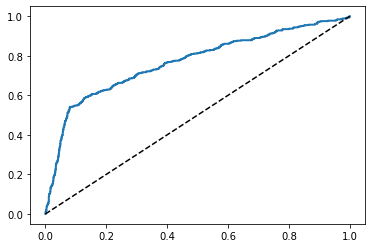

In [73]:
y_abc_scores = abc_grid_results.predict_proba(X_test)[:,1]
y_abc_pred = abc_grid_results.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_abc_scores)
plot_roc_curve(fpr, tpr)
print("AUC: " + str(roc_auc_score(y_test, y_abc_scores)))

print(confusion_matrix(y_test, y_abc_pred))
print(classification_report(y_test, y_abc_pred))

count_misclassified = (y_test != y_abc_pred).sum()


print("AdaBoostClassifier")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_abc_pred)
print('Accuracy: {:.2f}'.format(accuracy))

## 2. Do the same for Gradient BoostingClassifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_params = {
    "n_estimators": [1, 10, 20, 100],
    "learning_rate": [0.05, 0.1, 0.25, 0.5, 0.75, 1],
    "criterion": ["friedman_mse", "squared_error", "mse", "mae"],
    "max_depth": [1, 2, 5, 10]
}

gbc = GradientBoostingClassifier()
#grid search
gbc_grid_search = GridSearchCV(estimator=gbc, param_grid=gbc_params, n_jobs=-1, cv=3, refit=True, verbose =3)
gbc_grid_results = gbc_grid_search.fit(X_train, y_train)


print(gbc_grid_results.best_params_)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed: 24.1min finished


{'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}


AUC: 0.7451442832944101
[[2100  142]
 [ 250  195]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      2242
         1.0       0.58      0.44      0.50       445

    accuracy                           0.85      2687
   macro avg       0.74      0.69      0.71      2687
weighted avg       0.84      0.85      0.85      2687

GradientBoostingClassifier
Misclassified samples: 392
Accuracy: 0.85


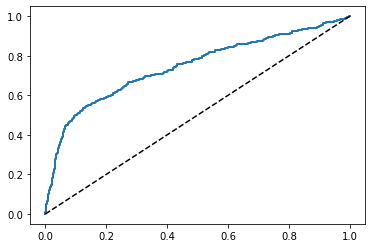

In [74]:
y_gbc_scores = gbc_grid_results.predict_proba(X_test)[:,1]
y_gbc_pred = gbc_grid_results.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_gbc_scores)
plot_roc_curve(fpr, tpr)
print("AUC: " + str(roc_auc_score(y_test, y_gbc_scores)))

print(confusion_matrix(y_test, y_gbc_pred))
print(classification_report(y_test, y_gbc_pred))

count_misclassified = (y_test != y_gbc_pred).sum()


print("GradientBoostingClassifier")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_gbc_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# 12. Finally, briefly discuss your finding such as which model could be most suitable for this given scenario and what could be your future work based on this experiment.

Looking at the results I found that 3 models have rather similiar AUC and Accuracy rates. These models are GradientBoosting, ADABoost and Random Forest. While all the results are rather similiar and would be within margin of error of one another I suggest we go with Random Forest becaususe of the least number of false positives and the relativly fast speed to gridsearch and perform.